In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

# Método leapfrog

$$ \vec{a}(t) = F(x(t)) $$

$$ \vec{v}_{n+1/2} = \vec{v}_{n-1/2} + \vec{a}(x_{n})\Delta t $$

$$ \vec{v}(t + \Delta t/2) = \vec{v}(t - \Delta t/2) + \vec{a}(t)\Delta t $$

$$ \vec{r}_{n+1} = \vec{r}_{n} + \vec{v}_{n+1/2} \Delta t $$

$$ \vec{r}(t+\Delta t) = \vec{r}(t) + \vec{v}(t + \Delta t/2) \Delta t $$

Para iniciar el método necesitamos $\vec{v}_{-1/2}$, el cuál lo podemos inicializar con el método de Euler.

$$ \vec{v}_{-1/2} = \vec{v}(0) - \Delta t/2 \vec{a}(0)  $$

# Resolvamos el siguiente sistema

$$ \frac{d^{2}x}{dt^{2}} + \pi^{2}x = 0 $$

Con condiciones iniciales:

$$ x(0) = 1, \dot{x}(0) = 0 $$ 

In [2]:
TMin, TMax, N = 0.,5., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)
print(h, t.shape)

0.025 (201,)


In [3]:
r0 = np.array([1.0,0])

In [4]:
def GetA(x):
    #return -(np.pi)**2*x
    #Pendulo
    return -(np.pi)**2*np.sin(x)

In [5]:
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [6]:
x, v = GetLeapFrog(r0,t)

<IPython.core.display.Javascript object>


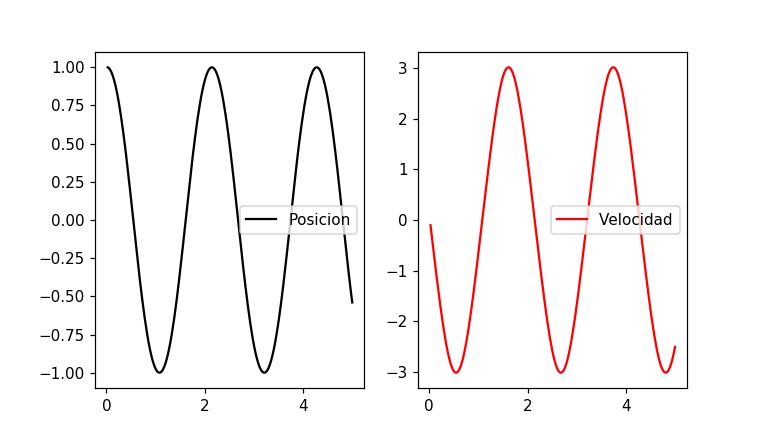

In [7]:
fig0 = plt.figure(figsize=(7,4))
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
ax.plot(t[1:],x, '-k',label='Posicion')
ax1.plot(t[1:],v, '-r',label='Velocidad')
ax.legend(loc=0)
ax1.legend(loc=0)
plt.show()

In [8]:
E = 0.5*(np.pi**2)*x**2 + 0.5*v**2
meanE = np.mean(E)

<IPython.core.display.Javascript object>


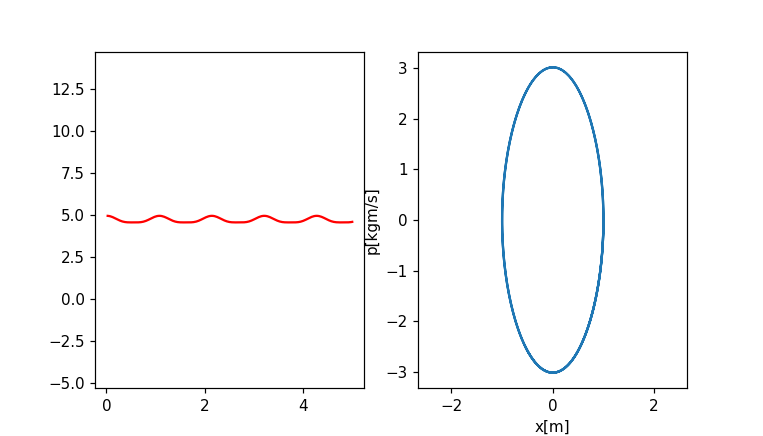

Text(0, 0.5, 'p[kgm/s]')

In [9]:
fig1 = plt.figure(figsize=(7,4))
_ax = fig1.add_subplot(121)
_ax1 = fig1.add_subplot(122)
_ax.plot(t[1:],E[0:],'-r', label='Energía')
_ax1.plot(x,v,'-')

_ax1.axis('equal')

_ax.set_ylim(meanE-10,meanE+10)

_ax1.set_xlabel('x[m]')
_ax1.set_ylabel('p[kgm/s]')

#_ax.legend()
#_ax1.legend()

<IPython.core.display.Javascript object>


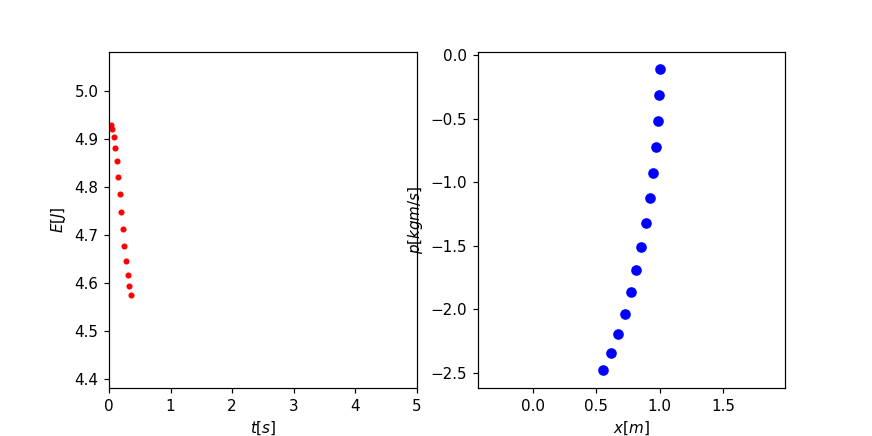

In [10]:
fig2 = plt.figure(figsize=(8,4))
ax = fig2.add_subplot(1,2,1)
ax1 = fig2.add_subplot(1,2,2)

def init():
    ax.set_xlim(TMin,TMax)
    ax.set_ylim(meanE-0.3,meanE+0.4)
   # ax1.set_xlim(np.min(V),np.max(V))
   # ax1.set_ylim(np.min(V),np.max(V))
    
    ax1.axis('equal')
    
def Update(i):
    
   # plot = ax.clear()
  #  plot = ax1.clear()
    init()
    
    plot = ax.scatter(t[i+1],E[i],c='r',marker='.',label='Energía')
    plot = ax1.scatter(x[i],v[i],c='b',label='Phase space')
    
    plot = ax.set_xlabel(r'$t[s]$')
    plot = ax.set_ylabel(r'$E[J]$')
    
    plot = ax1.set_xlabel(r'$x[m]$')
    plot = ax1.set_ylabel(r'$p[kgm/s]$')
    
    #plot = ax.legend()
    #plot = ax1.legend()
    
    return plot

Animation = anim.FuncAnimation(fig2,Update,frames=len(x),init_func=init)

<IPython.core.display.Javascript object>


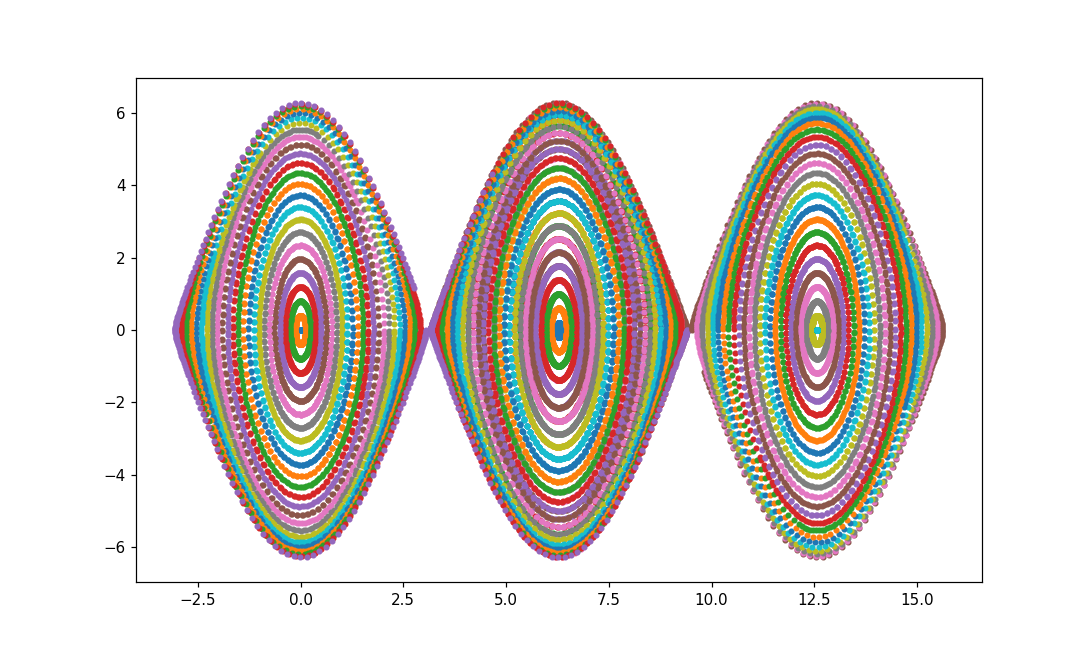

In [11]:
theta = np.linspace(0.,4.0*np.pi,100)

fig3 = plt.figure(figsize=(10,6))
ax3 = fig3.add_subplot(1,1,1)


for i in range(len(theta)):
    theta_, vtheta_= GetLeapFrog(np.array([theta[i],0.]),t)
    ax3.scatter(theta_,vtheta_, marker='.')
    
plt.show()
plt.savefig('EspacioFasePendulo.pdf')